<a href="https://colab.research.google.com/github/jadedevon02/ITBAN3/blob/main/Laboratory_Exercise_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Import the necessary packages and libraries.

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


2. Import and load the dataset. Set the client_id as the index and Display the contents of the dataset by showing its first 5 row





In [8]:
df = pd.read_csv("/content/drive/MyDrive/ITBAN3/Colab Notebooks/loans.csv")
df.set_index('client_id', inplace = True)

df.head(5)

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


4. Check the info of the dataset and the datatypes for each columns.



In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 46109 to 26945
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loan_type    443 non-null    object 
 1   loan_amount  443 non-null    int64  
 2   repaid       443 non-null    int64  
 3   loan_id      443 non-null    int64  
 4   loan_start   443 non-null    object 
 5   loan_end     443 non-null    object 
 6   rate         443 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 27.7+ KB


5. Determine whether the dataset has missing values.



In [14]:
if df.isnull().any().any():
  print("\nDataset has missing value")
else:
  print("\nDataset has no missing value")


Dataset has no missing value


6. Check if there is a presence of outliers using Boxplot.



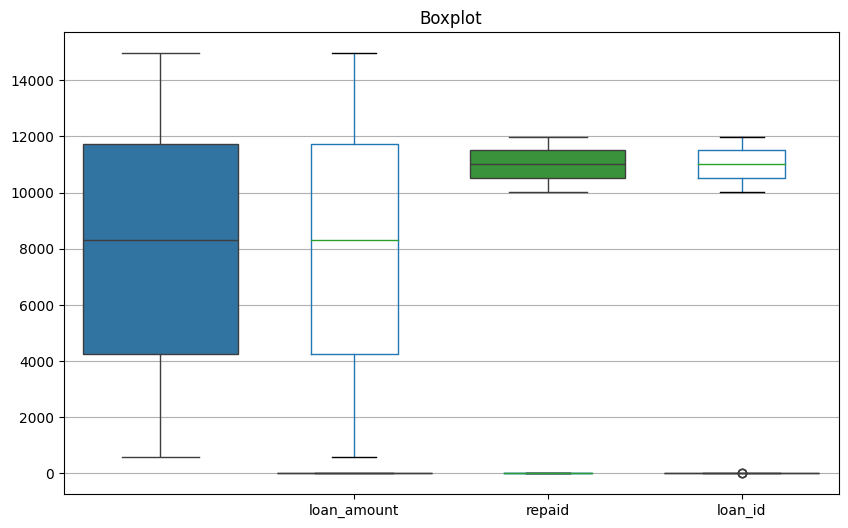

In [17]:
plt.figure(figsize=(10, 6))
df.boxplot()
sns.boxplot(data=df)
plt.title(f'Boxplot')
plt.show()

7. If there are a presence of outliers, do the following and explain the results:

a. Treat them using SQRT transformation




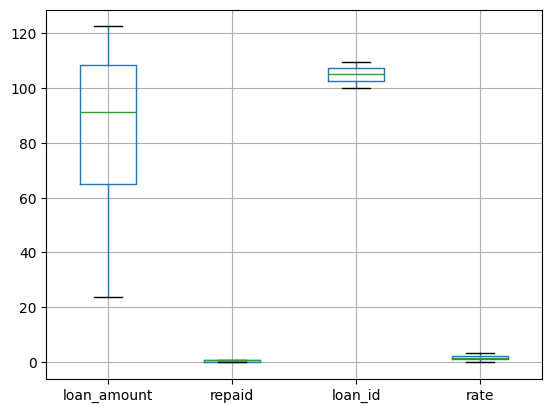

In [18]:
df_sqrt_transformed = df.copy()
numerical_cols = df_sqrt_transformed.select_dtypes(include=[np.number]).columns
df_sqrt_transformed[numerical_cols] = np.sqrt(df_sqrt_transformed[numerical_cols])

df_sqrt_transformed.boxplot()
plt.show()

b. Treat them using the capping approach: Z-Score.


In [19]:
from scipy import stats

z_scores = np.abs(stats.zscore(df[numerical_cols]))
threshold = 3
df_z_capped = df[(z_scores < threshold).all(axis=1)]

print(f"Number of rows before capping: {df.shape[0]}")
print(f"Number of rows after capping: {df_z_capped.shape[0]}")

Number of rows before capping: 443
Number of rows after capping: 440


8. Upon checking the datatypes for each columns, for numerical variables, apply scaling using Min-Max Normalization. Display the skewness and kurtosis graphs for Loan Amount and explain the results.


In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])

df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


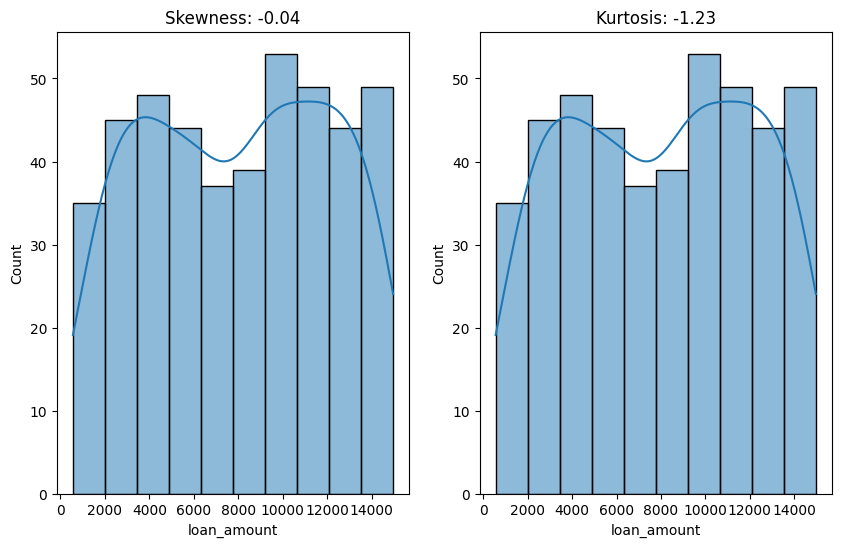

In [22]:
from scipy.stats import skew, kurtosis
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['loan_amount'], kde=True)
plt.title(f'Skewness: {round(skew(df["loan_amount"]), 2)}')

plt.subplot(1, 2, 2)
sns.histplot(df['loan_amount'], kde=True)
plt.title(f'Kurtosis: {round(kurtosis(df["loan_amount"]), 2)}')

plt.show()



9. As for the categorical features, apply encoding of categorical variables into dummy variables using pd.get_dummies approach. Show the first five (5) rows.

In [23]:
df_with_dummies = pd.get_dummies(df, drop_first = True)

print(df_with_dummies.head(5))

           loan_amount  repaid  loan_id  rate  loan_type_credit  \
client_id                                                         
46109            13672       0    10243  2.15                 0   
46109             9794       0    10984  1.25                 1   
46109            12734       1    10990  0.68                 0   
46109            12518       1    10596  1.24                 0   
46109            14049       1    11415  3.13                 1   

           loan_type_home  loan_type_other  loan_start_2000-03-06  \
client_id                                                           
46109                   1                0                      0   
46109                   0                0                      0   
46109                   1                0                      0   
46109                   0                0                      0   
46109                   0                0                      0   

           loan_start_2000-03-08  loan_start_2

10. Create new derived features to calculate the tenure of the loan by using the loan_start and loan_end.

In [24]:
df['loan_start'] = pd.to_datetime(df['loan_start'])
df['loan_end'] = pd.to_datetime(df['loan_end'])
df['loan_tenure'] = (df['loan_end'] - df['loan_start']).dt.days / 365

print(df[['loan_start', 'loan_end', 'loan_tenure']].head())

          loan_start   loan_end  loan_tenure
client_id                                   
46109     2002-04-16 2003-12-20     1.679452
46109     2003-10-21 2005-07-17     1.739726
46109     2006-02-01 2007-07-05     1.421918
46109     2010-12-08 2013-05-05     2.408219
46109     2010-07-07 2012-05-21     1.873973


11. Split the data into training and test sets with 80-20 division.


In [25]:
from sklearn.model_selection import train_test_split
X = df.drop('loan_amount', axis=1)
y = df['loan_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (354, 7) (354,)
Test set shape: (89, 7) (89,)
